# Universidad de Buenos Aires
# Deep Learning - Examen

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing

El dataset son compras de productos que diferentes clientes realizaron durante el black sales.

El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuanto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gatar mucha plata (más de 9000) o poca plata (menos de 9000).

Vamos a construir 4 modelos:

* Un modeo que siempre predice que los clientes gastan mucha plata en todos los productos.
* Un modelo del tipo de Regresión Logīstica. 
* Un modelo del tipo Random Forest.
* Un modelo del tipo Deep Learning sin embeddings.
* Un modelo del tipo Deep Learning con embeddings.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/UBA IA 2020/4-DL1/examen')

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

In [ ]:
dataset = pd.read_csv('black_sales.csv')

# Análisis de datos

1. Imprimir las 5 primeros filas del dataset. 
2. Imprimir los tipos de cada columna del dataset.
3. Imprimir las estadísticas básicas de cada columnas. 
4. Hacer un histograma de la variable Purchase.
5. Que columnas son categóricas y cuales son numéricas?
6. Para las columnas categóricas, cuántas clases únicas tienen cada una?

In [ ]:
# 1 - Golpe de vista del dataset
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# 2 - Info del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# 3 - Estadiística
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


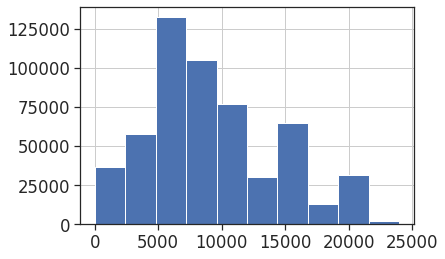

In [ ]:
# 4 - Histograma de purchase
dataset['Purchase'].hist()

5 - Variables categóricas y numércias
Categóricas:
- User_ID --> Representan los IDs de los usuarios
- Product_id --> Representa los IDs de los productos
- Gender --> (F) o (M)
- Age --> Rango de edades
- Occupation --> Representan los ids de tipo de ocupación
- City_Category --> Categoría de la ciudad
- Stay_In_Current_City_Years --> Rango de tiempo en la ciudad
- Marital_Status --> Representan el estado marital (0 o 1)
- Product_Category_1/2/3 --> Repesentan categórias de productos, pero están en formato Ids

Numéricas:
- Purchase --> Monto gastado en la compra


In [ ]:
# 6 - Cantidad de clases
print('Cantidad de clases:', dataset['User_ID'].nunique())
dataset['User_ID'].value_counts()

Cantidad de clases: 5891


1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Product_ID'].nunique())
dataset['Product_ID'].value_counts()

Cantidad de clases: 3631


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00013442       1
P00241842       1
P00106342       1
P00208642       1
P00315242       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Gender'].nunique())
dataset['Gender'].value_counts()

Cantidad de clases: 2


M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Age'].nunique())
dataset['Age'].value_counts()

Cantidad de clases: 7


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['City_Category'].nunique())
dataset['City_Category'].value_counts()

Cantidad de clases: 3


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Stay_In_Current_City_Years'].nunique())
dataset['Stay_In_Current_City_Years'].value_counts()

Cantidad de clases: 5


1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Occupation'].nunique())
dataset['Occupation'].value_counts()


Cantidad de clases: 21


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Marital_Status'].nunique())
dataset['Marital_Status'].value_counts()

Cantidad de clases: 2


0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Product_Category_1'].nunique())
dataset['Product_Category_1'].value_counts()

Cantidad de clases: 20


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Product_Category_2'].nunique())
dataset['Product_Category_1'].value_counts()

Cantidad de clases: 17


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [ ]:
print('Cantidad de clases:', dataset['Product_Category_3'].nunique())
dataset['Product_Category_1'].value_counts()

Cantidad de clases: 15


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

# Limpieza de datos

1. Que columnas tienen NaNs?
2. Si la cantidad de filas afectas por NaNs es grande, se propone reemplazar los NaNs por una nueva clase, por ejemplo el valor 999. 


In [ ]:
# 1 - Que columnas tienen NaNs
des = dataset.describe()
des.loc['Nan'] = dataset.isna().sum()
des.loc['%Nan'] = (dataset.isna().mean())*100
des

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000
Nan,0.000000e+00,0.000000,0.000000,0.000000,173638.000000,383247.000000,0.000000
%Nan,0.000000e+00,0.000000,0.000000,0.000000,31.566643,69.672659,0.000000


Se puede observar que tanto Product_Category_2 como Product_Category_3 poseen NaNs en una gran proporcioón (31% y 69% respectivamente. No es posible descartar tantas filas, hay que reemplazar.


In [ ]:
# 2 - Completar los NaN con la categoría 999
df = dataset.copy()
df.loc[:, ['Product_Category_2', 'Product_Category_3']] = df[['Product_Category_2', 'Product_Category_3']].fillna(999)
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,322.086197,699.871801,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,459.761105,453.395520,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,14.000000,999.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,999.000000,999.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,999.000000,999.000000,23961.000000
Nan,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Ingeniería de features

1. Transformar todas las variables categoricas (expecto User_Id y Prdoct_Id) en one-hot-encoding. 
2. Crear un index para User_Id y Product_id, para poder entrenar un modelo de Deep Learning con embeddings.
3. Porque es importante crear un index para entrenar el modelo de Deep Learning con embeddings?
4. Porque es importante guardar el mapping de id a index?
5. Transformar la variable Purchase en una variable purchase_binary, tal que todos los valores mayores a 9000 hagan un mapping a 1 y todos los valores menores o iguales a 9000 hagan un mapping a 0.
6. Normalizar todos los valores entre 0 y 1.
7. Hacer un split del dataset en training (70%), validation (20%) y testing (10%). Para crear el dataset de training se recomienda separar User_id y Product_id de la matriz x_train, x_valid y x_test. Pero también obtener user_idx_train, user_idx_valid y user_idex_test de tal manera que sea correspondientes con las matrices x. Lo mismo para el Product_Id. 

In [ ]:
# 1 - OneHotEncoding
df_coded = df[['User_ID', 'Product_ID', 'Purchase']]

df_coded = pd.concat([df_coded, pd.get_dummies(df['Gender'], prefix='Gender')], axis=1)
df_coded = pd.concat([df_coded, pd.get_dummies(df['Age'], prefix='Age')], axis=1)
df_coded = pd.concat([df_coded, pd.get_dummies(df['Occupation'], prefix='Occupation')], axis=1)
df_coded = pd.concat([df_coded, pd.get_dummies(df['City_Category'], prefix='City_Category')], axis=1)
df_coded = pd.concat([df_coded, pd.get_dummies(df['Stay_In_Current_City_Years'], prefix='Stay_In_Current_City_Years')], axis=1)
df_coded = pd.concat([df_coded, pd.get_dummies(df['Marital_Status'], prefix='Marital_Status')], axis=1)
df_coded = pd.concat([df_coded, pd.get_dummies(df['Product_Category_1'], prefix='Product_Category_1')], axis=1)
df_coded = pd.concat([df_coded, pd.get_dummies(df['Product_Category_2'], prefix='Product_Category_2')], axis=1)
df_coded = pd.concat([df_coded, pd.get_dummies(df['Product_Category_3'], prefix='Product_Category_3')], axis=1)

print('Cantidad de coulmnas:', df_coded.shape[1])
df_coded.head()

Cantidad de coulmnas: 97


,User_ID,Product_ID,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,...,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_999.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_8.0,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_999.0
0,1000001,P00069042,8370,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1000001,P00248942,15200,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1000001,P00087842,1422,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1000001,P00085442,1057,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1000002,P00285442,7969,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# 2 - Codificar User_Id
print('Cantidad de clases:', df_coded['User_ID'].nunique(), ', cuyo máximo era:', df_coded['User_ID'].max())
user_id = df_coded['User_ID'].to_numpy()
_, user_idx = np.unique(user_id, return_inverse=True)
print('Nuevo map:', user_idx.max())

# Generar un diccionario para traducir
user_id2idx = {id:idx for id,idx in zip(user_id, user_idx)}
print('Dirccionario para traducir futuros valores de ID a idx para embeddings')
print(user_id2idx)

df_coded_2 = df_coded.copy()
df_coded_2['user_idx'] = user_idx

Cantidad de clases: 5891 , cuyo máximo era: 1006040
Nuevo map: 5890
Dirccionario para traducir futuros valores de ID a idx para embeddings
{1000001: 0, 1000002: 1, 1000003: 2, 1000004: 3, 1000005: 4, 1000006: 5, 1000007: 6, 1000008: 7, 1000009: 8, 1000010: 9, 1000011: 10, 1000012: 11, 1000013: 12, 1000014: 13, 1000015: 14, 1000016: 15, 1000017: 16, 1000018: 17, 1000019: 18, 1000021: 20, 1000022: 21, 1000023: 22, 1000024: 23, 1000025: 24, 1000026: 25, 1000027: 26, 1000028: 27, 1000029: 28, 1000030: 29, 1000031: 30, 1000032: 31, 1000033: 32, 1000034: 33, 1000035: 34, 1000036: 35, 1000037: 36, 1000039: 37, 1000041: 38, 1000042: 39, 1000043: 40, 1000044: 41, 1000045: 42, 1000046: 43, 1000047: 44, 1000048: 45, 1000049: 46, 1000050: 47, 1000051: 48, 1000052: 49, 1000053: 50, 1000054: 51, 1000056: 53, 1000057: 54, 1000058: 55, 1000059: 56, 1000060: 57, 1000061: 58, 1000062: 59, 1000063: 60, 1000064: 61, 1000065: 62, 1000066: 63, 1000067: 64, 1000068: 65, 1000069: 66, 1000070: 67, 1000071: 68,

In [ ]:
# 2 - Codificar User_Id
print('Cantidad de clases:', df_coded['Product_ID'].nunique(), ', cuyo máximo era:', df_coded['Product_ID'].max())
product_id = df_coded['Product_ID'].to_numpy()
_, product_idx = np.unique(product_id, return_inverse=True)
print('Nuevo map:', product_idx.max())

# Generar un diccionario para traducir
product_id2idx = {id:idx for id,idx in zip(product_id, product_idx)}
print('Dirccionario para traducir futuros valores de ID a idx para embeddings')
print(product_id2idx)

df_coded_3 = df_coded_2.copy()
df_coded_3['product_idx'] = product_idx

Cantidad de clases: 3631 , cuyo máximo era: P0099942
Nuevo map: 3630
Dirccionario para traducir futuros valores de ID a idx para embeddings
{'P00069042': 672, 'P00248942': 2376, 'P00087842': 852, 'P00085442': 828, 'P00285442': 2734, 'P00193542': 1831, 'P00184942': 1745, 'P00346142': 3320, 'P0097242': 3604, 'P00274942': 2631, 'P00251242': 2398, 'P00014542': 140, 'P00031342': 307, 'P00145042': 1355, 'P00231342': 2203, 'P00190242': 1798, 'P0096642': 3598, 'P00058442': 573, 'P00036842': 362, 'P00249542': 2382, 'P00220442': 2096, 'P00156442': 1469, 'P00213742': 2029, 'P00214442': 2036, 'P00303442': 2909, 'P00135742': 1264, 'P00039942': 391, 'P00161442': 1517, 'P00078742': 765, 'P00085942': 833, 'P00118742': 1096, 'P00297942': 2857, 'P00266842': 2552, 'P00058342': 572, 'P00032442': 318, 'P00105942': 969, 'P00182642': 1722, 'P00186942': 1765, 'P00155442': 1459, 'P00221342': 2105, 'P00087242': 846, 'P00111142': 1020, 'P00259342': 2478, 'P0094542': 3577, 'P00148642': 1391, 'P00312142': 2991, 'P

3 - index para embedding
Es importate la codificación de ID a index para crear embedding, ya que para aprovechar todo el espacio de valores continuos es neceario transformar los N elementos de una clase en una lista de numeros de 0 a N-1

4 - Guardar el codificador ID a IDX
Es importante para poder utilizar a futuro el modelo contra nuevos IDs ingresados y poder transformarlo a la entrada para el cual el modelo fue entrenado, su idx correspondiente 

0    330871
1    219197
Name: binary_purchase, dtype: int64

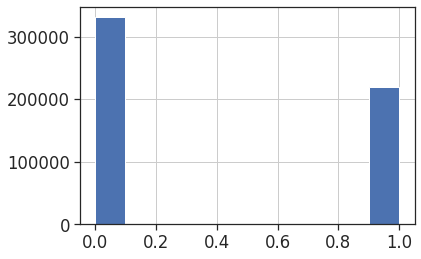

In [ ]:
# 5 - Purchase binaria
df_coded4 = df_coded.copy()
df_coded4['binary_purchase'] = dataset['Purchase'].apply(lambda x: 0 if x <= 9000 else 1)
df_coded4['binary_purchase'].hist()
df_coded4['binary_purchase'].value_counts()

Se puede ver está bastante balanceada la salida

In [ ]:
X = df_coded4.drop(['User_ID', 'Product_ID', 'Purchase', 'binary_purchase'], axis=1)
y = df_coded4['binary_purchase']
total = X.shape[0]
X_reducido = X[:int(total*0.25)]
print(X_reducido.shape)

y_reducido = y[:int(total*0.25)]
print(y_reducido.shape)

(137517, 94)
(137517,)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


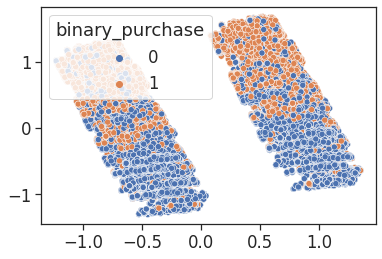

In [ ]:
# Graficar con PCA los features X reducido a 2 dimensiones
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)

sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y)

In [ ]:
import umap
reducer = umap.UMAP()

X_umap = reducer.fit_transform(X_reducido)
X_umap.shape

(137517, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


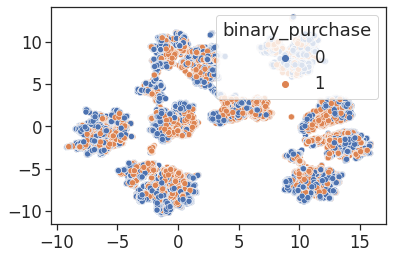

In [ ]:
sns.scatterplot(X_umap[:,0], X_umap[:,1], hue=y_reducido)

In [ ]:
# 7 - Separar el dataset en train (70%), val(20%) y test(10%)
n_samples = df_coded_4.shape[0]

indexes = np.random.permutation(np.arange(0, n_samples))

train_idx = indexes[0:int(0.7*n_samples)]
validation_idx = indexes[int(0.7*n_samples): int(0.9*n_samples)]
test_idx = indexes[int(0.9*n_samples):]
assert n_samples == train_idx.size + validation_idx.size + test_idx.size

# Train
x_train = X.iloc[train_idx,:]
y_train = y.iloc[train_idx].to_numpy()
user_idx_train = user_idx[train_idx]
product_idx_train = product_idx[train_idx]

# Validation
x_validation = X.iloc[validation_idx,:]
y_validation = y.iloc[validation_idx].to_numpy()
user_idx_validation = user_idx[validation_idx]
product_idx_validation = product_idx[validation_idx]

# Test
x_test = X.iloc[test_idx, :]
y_test = y.iloc[test_idx].to_numpy()
user_idx_test = user_idx[test_idx]
product_idx_test = product_idx[test_idx]

print(x_train.shape[0], x_validation.shape[0], x_test.shape[0])

385047 110014 55007


In [ ]:
# 6 - Normalizar los datos
# --> Este paso en realidad no sería necesario ya que los valores encuentran normalizados entre 0 y 1 por utilizar
# en todas las columnas OneHotEncoding
min_max_scaler = preprocessing.MinMaxScaler()

x_train_norm = min_max_scaler.fit_transform(x_train)
x_validation_norm = min_max_scaler.fit_transform(x_validation)
x_test_norm = min_max_scaler.fit_transform(x_test)

#Modelo base

1. Entrenar un modelo base que siempre de como predicción que el purchase del cliente es de valor elevado.
2. Calcular el AUC de este modelo.
3. Porque es importante siempre definir un modelo base?

In [ ]:
class BaseModel(object):
    def fit(self,X, y):
        return None
    def predict(self,X):
        return np.ones(X.shape[0])

In [ ]:
# 1 - Entrenar el modelo
base_model = BaseModel()
base_model.fit(x_train_norm, y_train)
base_predictions = base_model.predict(x_validation_norm)

In [ ]:
# Calcular AUC (esperado que de 0.5, ya que predice siempre el mismo valor)
fpr, tpr, threshold = metrics.roc_curve(y_validation, base_predictions)
print("AUC:", metrics.auc(fpr,tpr))

AUC: 0.5


3 - Definir un modelo base
Es importante siempre tener un modelo base para comparar nuestros modelos de IA, a fin de tener una noción de si tuve sentido el trabajo realizado en crear el modelo de IA y tener contra que contrastarlo

# Regresión logísica

1. Entrenar un modelo de regresión logística que sea mejor que el modelo base (no usar User_Id y Product_Id). 
2. Porque es importante normalizar los datos antes de entrenar el modelo de regresión logística?
3. Porque es importante utilizar una metrica como AUC en un problema de clasificación binaria?

In [ ]:
lr_model = LogisticRegression(C=1, solver='sag', max_iter=100)
lr_model.fit(x_train_norm, y_train)
lr_predictions = lr_model.predict(x_validation_norm)

In [ ]:
# Calcular AUC del modelo
fpr, tpr, threshold = metrics.roc_curve(y_validation, lr_predictions)
print("AUC:", metrics.auc(fpr,tpr))

AUC: 0.8649871613205101


Es importante normalizar ya que el la regresión logística se entrena mediente el gradiente descendente, para que no diverga el gradiente durante el entrenamiento los valores de entrada deben estar normalizados entre 0 y 1

# Random forest

1. Entrenar un modelo de Random Forest que sea mejor que el modelo base (no usar User_Id y Product_Id).

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=40, random_state=0)
rf_model.fit(x_train_norm, y_train)
rf_valid_pred = rf_model.predict(x_validation_norm)

In [ ]:
# Calcular AUC del modelo
fpr, tpr, threshold = metrics.roc_curve(y_validation, rf_valid_pred)
print("AUC:", metrics.auc(fpr,tpr))

AUC: 0.8509937206065876


# Deep learning sin embeddings

1. Entrenar un modelo de Deep Learning que no utilice embeddings (no usar User_Id y Product_Id).

In [ ]:
metrics_keras = [
    tf.keras.metrics.AUC()
]

In [ ]:
# Crear modelo sequencial
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics_keras
)

In [ ]:
model.fit(
    x_train_norm.astype(np.float32), 
    y_train.astype(np.float32),
    epochs=10,
    batch_size=512,
    validation_data=(x_validation_norm, y_validation),
)

Epoch 1/10
753/753 [==============================] - 3s 4ms/step - loss: 0.3172 - auc_1: 0.9267 - val_loss: 0.3073 - val_auc_1: 0.9317
Epoch 2/10
753/753 [==============================] - 2s 3ms/step - loss: 0.3074 - auc_1: 0.9316 - val_loss: 0.3056 - val_auc_1: 0.9331
Epoch 3/10
753/753 [==============================] - 3s 3ms/step - loss: 0.3047 - auc_1: 0.9334 - val_loss: 0.3048 - val_auc_1: 0.9337
Epoch 4/10
753/753 [==============================] - 3s 3ms/step - loss: 0.3030 - auc_1: 0.9345 - val_loss: 0.3042 - val_auc_1: 0.9338
Epoch 5/10
753/753 [==============================] - 3s 3ms/step - loss: 0.3012 - auc_1: 0.9356 - val_loss: 0.3036 - val_auc_1: 0.9343
Epoch 6/10
753/753 [==============================] - 2s 3ms/step - loss: 0.2999 - auc_1: 0.9363 - val_loss: 0.3030 - val_auc_1: 0.9348
Epoch 7/10
753/753 [==============================] - 3s 4ms/step - loss: 0.2988 - auc_1: 0.9370 - val_loss: 0.3038 - val_auc_1: 0.9346
Epoch 8/10
753/753 [============================

# Deep learning con embeddings

1. Entrenar un model de Deep Learning que utilice embeddings de los usuarios y los productos.

In [ ]:
x_input_shape = x_train.shape[1]
print('Columnas de entrada de x:', x_input_shape)

Columnas de entrada de x: 94


In [ ]:
user_dim = user_idx.max()+1
print('Cantidad de usuarios registrados:', user_dim)

Cantidad de usuarios registrados: 5891


In [ ]:
product_dim = product_idx.max()+1
print('Cantidad de usuarios registrados:', product_dim)

Cantidad de usuarios registrados: 3631


In [ ]:
# Crear modelo funcional

# Embeddings
user_input = tf.keras.Input(shape=(1,), name='user_input')
user_emb = keras.layers.Embedding(user_dim, 8, input_length=1, name='user_emb')(user_input)
user_flatten = keras.layers.Flatten()(user_emb)

product_input = tf.keras.Input(shape=(1,), name='product_input')
product_emb = keras.layers.Embedding(product_dim, 8, input_length=1, name='product_emb')(product_input)
product_flatten = keras.layers.Flatten()(product_emb)

input = tf.keras.Input(shape=x_input_shape, name='input')

# Concatenar los embeddins y la entrada
concatenated = keras.layers.Concatenate()([user_flatten, product_flatten, input])


out = tf.keras.layers.Dense(128)(concatenated)
out = tf.keras.layers.Activation('relu')(out)
out = tf.keras.layers.Dense(1)(out)
out = tf.keras.layers.Activation('sigmoid')(out)

model2 = tf.keras.Model(
    inputs = [user_input, product_input, input],
    outputs = out,
)

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics_keras
)


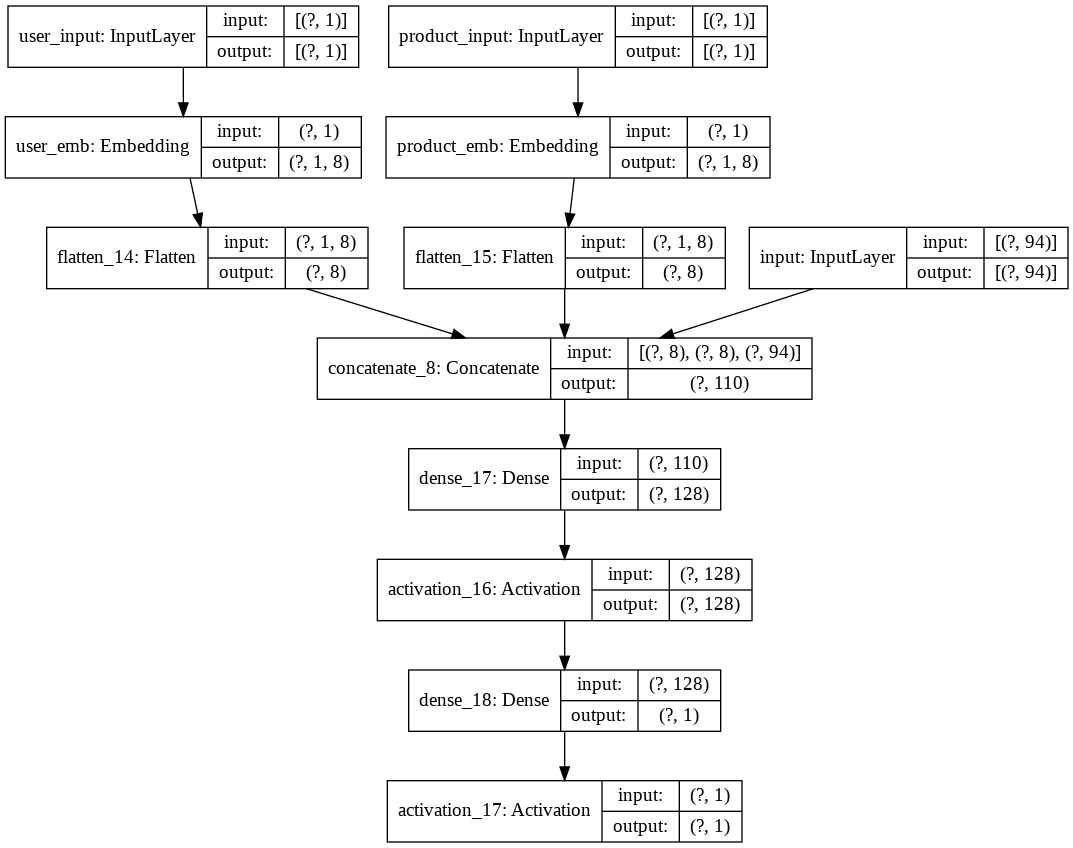

In [ ]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history3 = model2.fit(
    [user_idx_train.astype(np.float32), product_idx_train.astype(np.float32), x_train_norm.astype(np.float32)],
    y_train.astype(np.float32),
    epochs=10,
    batch_size=512,
    validation_data=([user_idx_validation, product_idx_validation, x_validation_norm], y_validation)
    )

Epoch 1/10
753/753 [==============================] - 4s 6ms/step - loss: 0.2753 - auc_1: 0.9462 - val_loss: 0.2600 - val_auc_1: 0.9549
Epoch 2/10
753/753 [==============================] - 4s 5ms/step - loss: 0.2494 - auc_1: 0.9585 - val_loss: 0.2573 - val_auc_1: 0.9559
Epoch 3/10
753/753 [==============================] - 4s 5ms/step - loss: 0.2402 - auc_1: 0.9615 - val_loss: 0.2573 - val_auc_1: 0.9561
Epoch 4/10
753/753 [==============================] - 4s 5ms/step - loss: 0.2324 - auc_1: 0.9641 - val_loss: 0.2593 - val_auc_1: 0.9556
Epoch 5/10
753/753 [==============================] - 4s 5ms/step - loss: 0.2254 - auc_1: 0.9662 - val_loss: 0.2655 - val_auc_1: 0.9555
Epoch 6/10
753/753 [==============================] - 4s 5ms/step - loss: 0.2189 - auc_1: 0.9681 - val_loss: 0.2688 - val_auc_1: 0.9538
Epoch 7/10
753/753 [==============================] - 4s 6ms/step - loss: 0.2121 - auc_1: 0.9702 - val_loss: 0.2782 - val_auc_1: 0.9531
Epoch 8/10
753/753 [============================

# Comparación de los modelos

1. Comparar los resultados obtenidos.
2. Hacer el gráfico de la región de decison para cada modelo.

#### 1 - Comparar resultados de los modelos
- Se puede observar que los modelos de DL mejorar el AUC respecto a los modelos tradicionales de ML, demorando practicamente el mismo tiempo de entrenamiento.
- El hecho de utilizar embeddings mejoró bastante el AUC respecto al modelo de DL básico
- La regresión logístca sacó mejor AUC que el RandomForest, es muy probable que eso se deba al max_depth y la cantidad de árboles que se limitaron para no demorar demasiado el tiempo de entrenamiento

__Conclusión__: Como era de esperarse el premio del día de lo lleva el modelo de DL con embeddings

¿Cómo podrían usar este clasificador que armaron para hacer un ranking de que productos recomendar a cada usuario? <br>
¿Podrían armar el ranking de productos a recomendar para cada user id?

Cuando se ingrese un usuario al clasificador, se puede variar los datos de entrada de las categorías de producto. Para ese usuario se podría evaluar si gastaría mucho o poco en ese producto (valor de probabilidad de 0 a 1 de cuanto gastaría, donde 1 es mucho)<br>
Se puede ingresar diversas categórias de productos por cada usuario y hacer un ranking en cada uno de con cuanta probaiblidad gastaría mucho en ese producto.

#### 2 - Hacer un gráfico de la región de decisión para cada modelo

In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)


(-2.2252746444484908,
 2.3347253555515133,
 -2.3042725908045947,
 2.6757274091954093)

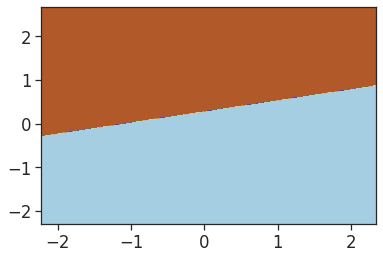

In [ ]:
# Regresion logistica

lr_model = LogisticRegression(C=1, solver='sag', max_iter=100)
lr_model.fit(X_pca, y)
#lr_predictions = lr_model.predict(x_validation_norm)

# Plot the decision boundary
n_classes = 2
plot_colors = "bry"
plot_step = 0.02


plt.subplot()

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

# Plot the training points


# for i, color in zip(range(n_classes), plot_colors):
#     idx = np.where(y == i)
#     plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=color, cmap=plt.cm.Paired)
#plt.axis("tight")

In [ ]:
from keras.utils import to_categorical 
y_cat =to_categorical(y, num_classes=2)
y_cat

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# Crear modelo sequencial
model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.Dense(128))
model3.add(tf.keras.layers.Activation('relu'))
model3.add(tf.keras.layers.Dense(2))
model3.add(tf.keras.layers.Activation('softmax'))

model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics_keras
)

In [ ]:
model3.fit(
    X_pca.astype(np.float32), 
    y_cat.astype(np.float32),
    epochs=10,
    batch_size=512
)

Epoch 1/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5298 - auc_1: 0.8103
Epoch 2/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5278 - auc_1: 0.8118
Epoch 3/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5266 - auc_1: 0.8120
Epoch 4/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5242 - auc_1: 0.8135
Epoch 5/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5220 - auc_1: 0.8159
Epoch 6/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5211 - auc_1: 0.8169
Epoch 7/10
1075/1075 [==============================] - 4s 4ms/step - loss: 0.5201 - auc_1: 0.8180
Epoch 8/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5194 - auc_1: 0.8187
Epoch 9/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5183 - auc_1: 0.8199
Epoch 10/10
1075/1075 [==============================] - 4s 3ms/step - loss: 0.5180 - auc_1: 0.8204


(-2.2252746444484908,
 2.3347253555515133,
 -2.3042725908045947,
 2.6757274091954093)

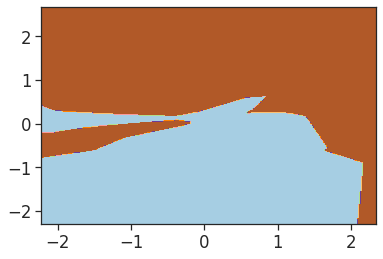

In [ ]:
# Plot the decision boundary
n_classes = 2
plot_colors = "bry"
plot_step = 0.02


plt.subplot()

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

Z_cat = model3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z_cat, axis=1)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

# Plot the training points
# for i, color in zip(range(n_classes), plot_colors):
#     idx = np.where(y == i)
#     plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=color, cmap=plt.cm.Paired)
#plt.axis("tight")